<a href="https://colab.research.google.com/github/jscriven0218/NTL-DS-Phase-1-Project-Template/blob/main/Phase1Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding`

Expanding into a new industry, like flight, is exciting!  With the proper research, we can run a safe and profitable aviation division that will take our company to new heights.

# Data Understanding

The National Transportation Safety Board collected aviation accident data from 1962 to 2023.  With 60+ years of information at our hands, we need to determine which make of airplane is best to supply to our clients.

In [140]:
import pandas as pd
import numpy as np
aviation = pd.read_csv('Aviation_Data.csv')
aviation.info()


<ipython-input-140-9b0a96dc3108>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation = pd.read_csv('Aviation_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### Data Preparation

Of the rows of data, we wanted to look only at those accidents/incidents regarding airplanes.  Unfortunately, only about 31% of the recorded data has an aircraft category listed, bringing our total incidents to analyze to just over 27,600.

In [141]:
#dropping any rows that do not have to do with events (accidents or incidents) occuring in airplanes
aviation.dropna(subset = ['Event.Id'],inplace = True)
aviation = aviation[aviation['Aircraft.Category'] == 'Airplane']
#drop any unncessary columns
aviation.drop(columns = ['Accident.Number','Location','Latitude','Longitude','Airport.Code','Airport.Name','Schedule'],inplace = True)
#replacing blanks with unknowns
aviation['Weather.Condition'] = aviation['Weather.Condition'].fillna('UNK')
aviation['Number.of.Engines'] = aviation['Number.of.Engines'].fillna('Unknown')
aviation['Amateur.Built'] = aviation['Amateur.Built'].fillna('Unknown')
#adding columns of total injured (fatal, serious or minor) and total in plane
aviation['Total.Fatal.Injuries'] = aviation['Total.Fatal.Injuries'].fillna(0)
aviation['Total.Serious.Injuries'] = aviation['Total.Serious.Injuries'].fillna(0)
aviation['Total.Minor.Injuries'] = aviation['Total.Minor.Injuries'].fillna(0)
aviation['Total.Uninjured'] = aviation['Total.Uninjured'].fillna(0)
aviation['Total.Injuries'] = aviation['Total.Fatal.Injuries'] + aviation['Total.Serious.Injuries'] + aviation['Total.Minor.Injuries']
aviation['Total.Passengers'] = aviation['Total.Injuries'] + aviation['Total.Uninjured']
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27617 entries, 5 to 90345
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27617 non-null  object 
 1   Investigation.Type      27617 non-null  object 
 2   Event.Date              27617 non-null  object 
 3   Country                 27610 non-null  object 
 4   Injury.Severity         26803 non-null  object 
 5   Aircraft.damage         26335 non-null  object 
 6   Aircraft.Category       27617 non-null  object 
 7   Registration.Number     27382 non-null  object 
 8   Make                    27608 non-null  object 
 9   Model                   27586 non-null  object 
 10  Amateur.Built           27617 non-null  object 
 11  Number.of.Engines       27617 non-null  object 
 12  Engine.Type             23391 non-null  object 
 13  FAR.Description         27118 non-null  object 
 14  Purpose.of.flight       23878 non-null  obj

<ipython-input-141-a3e8a18a4a2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation.drop(columns = ['Accident.Number','Location','Latitude','Longitude','Airport.Code','Airport.Name','Schedule'],inplace = True)
<ipython-input-141-a3e8a18a4a2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation['Weather.Condition'] = aviation['Weather.Condition'].fillna('UNK')
<ipython-input-141-a3e8a18a4a2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [143]:
aviation.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Total.Passengers
5,20170710X52551,Accident,9/17/1979,United States,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,...,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1.0,45.0
7,20020909X01562,Accident,1/1/1982,United States,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1/1/1982,0.0,2.0
8,20020909X01561,Accident,1/1/1982,United States,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1/1/1982,0.0,2.0
12,20020917X02148,Accident,1/2/1982,United States,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,2/1/1983,1.0,1.0
13,20020917X02134,Accident,1/2/1982,United States,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,2/1/1983,1.0,1.0


In [144]:
#save clean data
aviation.to_csv('Aviation_Clean.csv')

### Data Analysis

In [145]:
import matplotlib
import matplotlib.pyplot as plt

When preparing the data, I noted a handful of factors in the safety of the planes.  Engine type, amateur build and weather condititions all appear to be factors of the number and severity of accidents.

In [146]:
#dropping any rows that do not have engine types listed
enginetype = aviation
enginetype = enginetype.dropna(subset = ['Engine.Type'], inplace = False)
enginetype = enginetype[enginetype['Engine.Type'] != 'Unknown']
enginetype = enginetype[enginetype['Engine.Type'] != 'UNK']
enginetype = enginetype[enginetype['Total.Passengers'] != 0]
enginetype.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23027 entries, 5 to 90226
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                23027 non-null  object 
 1   Investigation.Type      23027 non-null  object 
 2   Event.Date              23027 non-null  object 
 3   Country                 23020 non-null  object 
 4   Injury.Severity         23027 non-null  object 
 5   Aircraft.damage         22560 non-null  object 
 6   Aircraft.Category       23027 non-null  object 
 7   Registration.Number     23009 non-null  object 
 8   Make                    23021 non-null  object 
 9   Model                   23010 non-null  object 
 10  Amateur.Built           23027 non-null  object 
 11  Number.of.Engines       23027 non-null  object 
 12  Engine.Type             23027 non-null  object 
 13  FAR.Description         22930 non-null  object 
 14  Purpose.of.flight       21642 non-null  obj

In [147]:
engine_type = enginetype.groupby('Engine.Type').agg({'Total.Passengers':'sum','Total.Fatal.Injuries':'sum','Total.Serious.Injuries':'sum','Total.Minor.Injuries':'sum','Total.Uninjured':'sum'})
engine_type

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,2.0,0.0,0.0,0.0,2.0
Geared Turbofan,121.0,0.0,0.0,0.0,121.0
Reciprocating,36722.0,6165.0,4427.0,3774.0,22356.0
Turbo Fan,73500.0,1156.0,1026.0,523.0,70795.0
Turbo Jet,6649.0,78.0,84.0,44.0,6443.0
Turbo Prop,5440.0,910.0,289.0,225.0,4016.0
Turbo Shaft,25.0,3.0,0.0,3.0,19.0


<ipython-input-148-dc1ba32dae53>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  engine_type_axes[0].set_xticklabels(engine_type.index,rotation=45)
<ipython-input-148-dc1ba32dae53>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  engine_type_axes[1].set_xticklabels(engine_type.index,rotation=45)


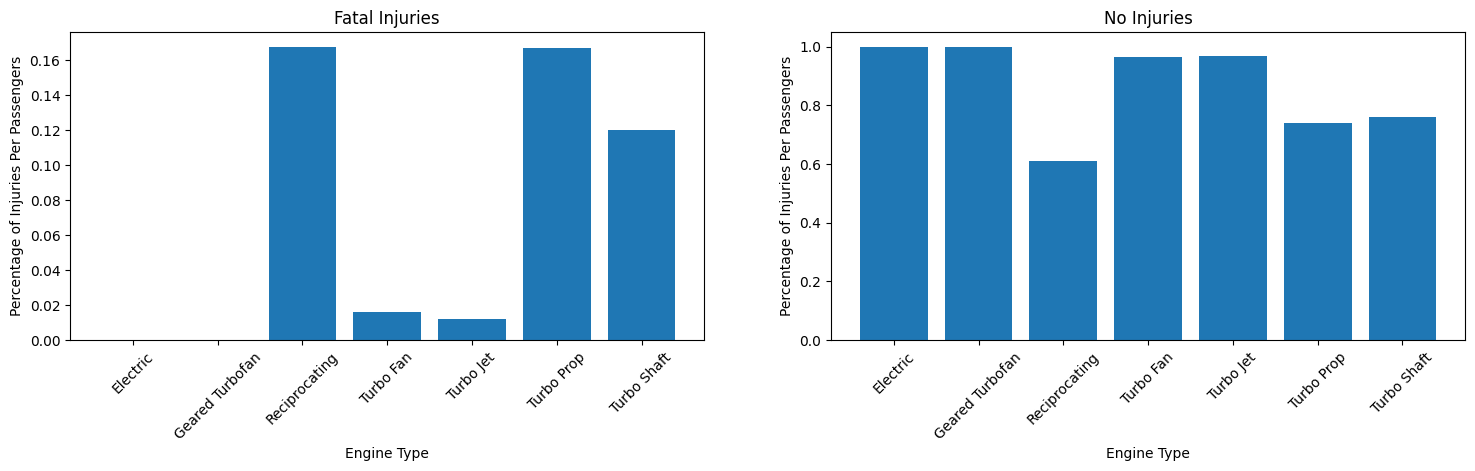

In [148]:
engine_type_fig, engine_type_axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

engine_type_axes[0].set_title('Fatal Injuries')
engine_type_axes[0].set_ylabel('Percentage of Injuries Per Passengers')
engine_type_axes[0].set_xlabel('Engine Type')

#engine_type_axes[1].set_title('Serious Injuries')
#engine_type_axes[1].set_ylabel('Percentage of Injuries Per Passengers')
#engine_type_axes[1].set_xlabel('Engine Type')

#engine_type_axes[2].set_title('Minor Injuries')
#engine_type_axes[2].set_ylabel('Percentage of Injuries Per Passengers')
#engine_type_axes[2].set_xlabel('Engine Type')

engine_type_axes[1].set_title('No Injuries')
engine_type_axes[1].set_ylabel('Percentage of Injuries Per Passengers')
engine_type_axes[1].set_xlabel('Engine Type')

engine_type_axes[0].bar(engine_type.index, engine_type['Total.Fatal.Injuries']/engine_type['Total.Passengers'])
#engine_type_axes[1].bar(engine_type.index, engine_type['Total.Serious.Injuries']/engine_type['Total.Passengers'])
#engine_type_axes[2].bar(engine_type.index, engine_type['Total.Minor.Injuries']/engine_type['Total.Passengers'])
engine_type_axes[1].bar(engine_type.index, engine_type['Total.Uninjured']/engine_type['Total.Passengers'])

engine_type_axes[0].set_xticklabels(engine_type.index,rotation=45)
engine_type_axes[1].set_xticklabels(engine_type.index,rotation=45)

plt.show()

In [149]:
#dropping any rows that do not have engine types listed
weather = aviation
weather = weather.dropna(subset = ['Weather.Condition'], inplace = False)
weather = weather[weather['Weather.Condition'] != 'Unk']
weather = weather[weather['Weather.Condition'] != 'UNK']
weather = weather[weather['Total.Passengers'] != 0]
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 5 to 90345
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                24104 non-null  object 
 1   Investigation.Type      24104 non-null  object 
 2   Event.Date              24104 non-null  object 
 3   Country                 24098 non-null  object 
 4   Injury.Severity         24104 non-null  object 
 5   Aircraft.damage         23690 non-null  object 
 6   Aircraft.Category       24104 non-null  object 
 7   Registration.Number     23991 non-null  object 
 8   Make                    24097 non-null  object 
 9   Model                   24083 non-null  object 
 10  Amateur.Built           24104 non-null  object 
 11  Number.of.Engines       24104 non-null  object 
 12  Engine.Type             22329 non-null  object 
 13  FAR.Description         24093 non-null  object 
 14  Purpose.of.flight       22879 non-null  obj

In [150]:
weather['Weather.Condition'].value_counts()

,count
Weather.Condition,
VMC,22706
IMC,1398


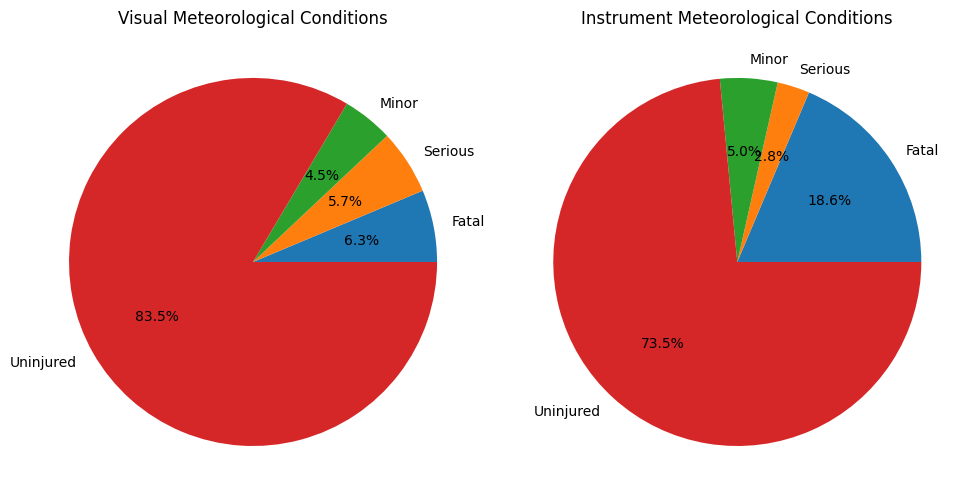

In [152]:
IMC = weather[weather['Weather.Condition'] == 'IMC']
VMC = weather[weather['Weather.Condition'] == 'VMC']

IMC_labels = ['Fatal','Serious','Minor','Uninjured']
IMC_values = [IMC['Total.Fatal.Injuries'].sum(),IMC['Total.Serious.Injuries'].sum(),IMC['Total.Minor.Injuries'].sum(),IMC['Total.Uninjured'].sum()]

VMC_labels = ['Fatal','Serious','Minor','Uninjured']
VMC_values = [VMC['Total.Fatal.Injuries'].sum(),VMC['Total.Serious.Injuries'].sum(),VMC['Total.Minor.Injuries'].sum(),VMC['Total.Uninjured'].sum()]

fig, (VMCPlot, IMCPlot) = plt.subplots(1, 2, figsize=(10, 5))

VMCPlot.pie(VMC_values,labels=VMC_labels,autopct='%1.1f%%')
VMCPlot.set_title('Visual Meteorological Conditions')

IMCPlot.pie(IMC_values,labels=IMC_labels,autopct='%1.1f%%')
IMCPlot.set_title('Instrument Meteorological Conditions')

plt.tight_layout()
plt.show()

In [ ]:
V